In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

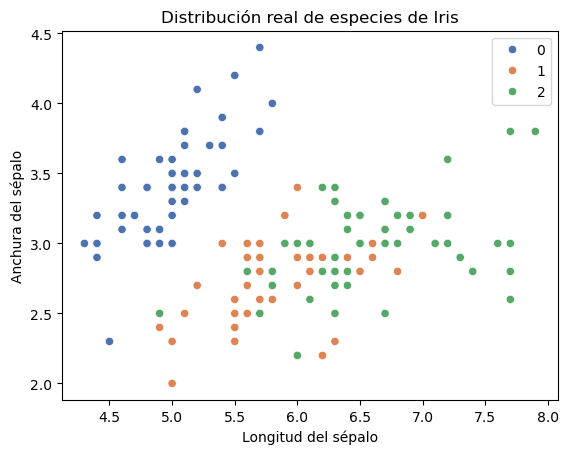

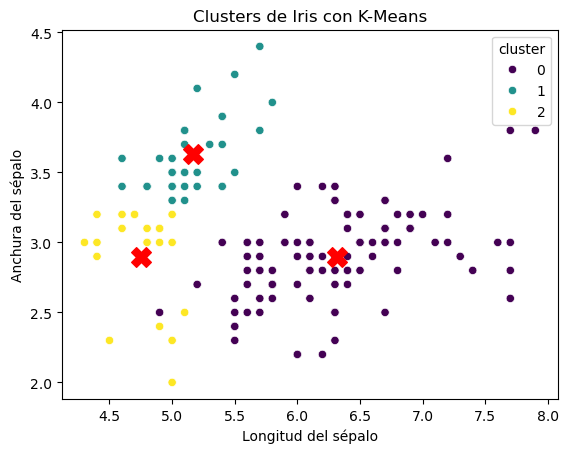

Silhouette Score (Iris): 0.4798814508199817


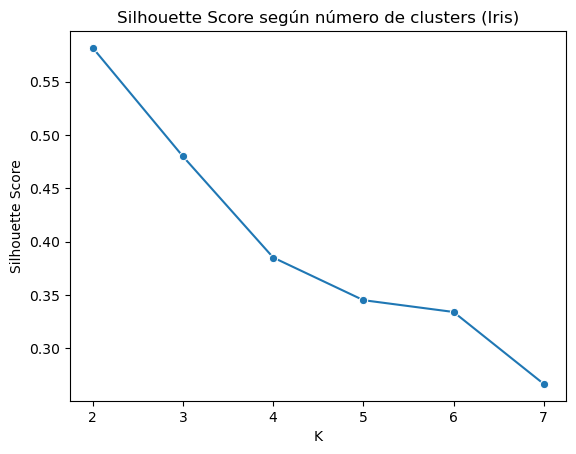

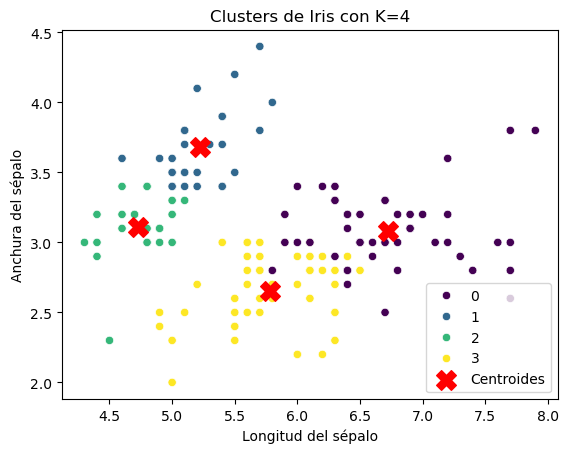

In [ ]:

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
true_labels = iris.target

sns.scatterplot(
    x=X[iris.feature_names[0]],
    y=X[iris.feature_names[1]],
    hue=true_labels,
    palette='deep'
)
plt.title("Distribución real de especies de Iris")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Anchura del sépalo")
plt.show()

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_norm)

X['cluster'] = kmeans.labels_

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

sns.scatterplot(
    x=X[iris.feature_names[0]],
    y=X[iris.feature_names[1]],
    hue=X['cluster'],
    palette='viridis'
)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='red', marker='X', label='Centroides'
)
plt.title("Clusters de Iris con K-Means")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Anchura del sépalo")
plt.show()

print("Silhouette Score (Iris):", silhouette_score(X_norm, kmeans.labels_))

K = range(2, 8)
fits = []
scores = []

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_norm)
    fits.append(model)
    scores.append(silhouette_score(X_norm, model.labels_))

sns.lineplot(x=K, y=scores, marker='o')
plt.title("Silhouette Score según número de clusters (Iris)")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

chosen_k = 4
chosen_model = fits[chosen_k - 2] 
chosen_centroids = scaler.inverse_transform(chosen_model.cluster_centers_)

sns.scatterplot(
    x=X[iris.feature_names[0]],
    y=X[iris.feature_names[1]],
    hue=chosen_model.labels_,
    palette='viridis'
)
plt.scatter(
    chosen_centroids[:, 0],
    chosen_centroids[:, 1],
    s=200, c='red', marker='X', label='Centroides'
)
plt.title(f"Clusters de Iris con K={chosen_k}")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Anchura del sépalo")
plt.legend()
plt.show()

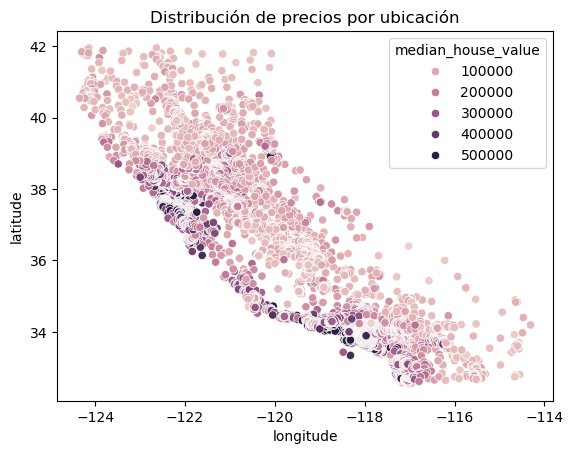

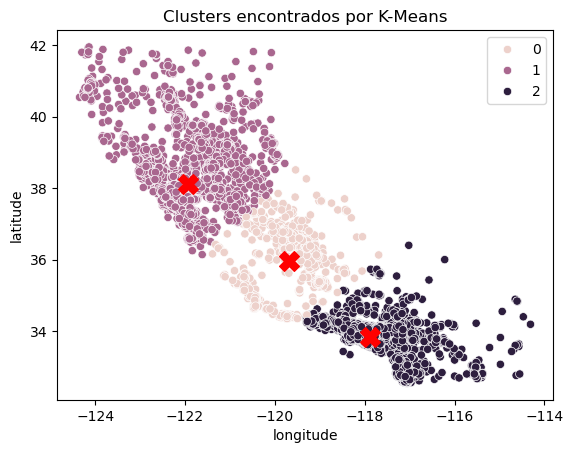

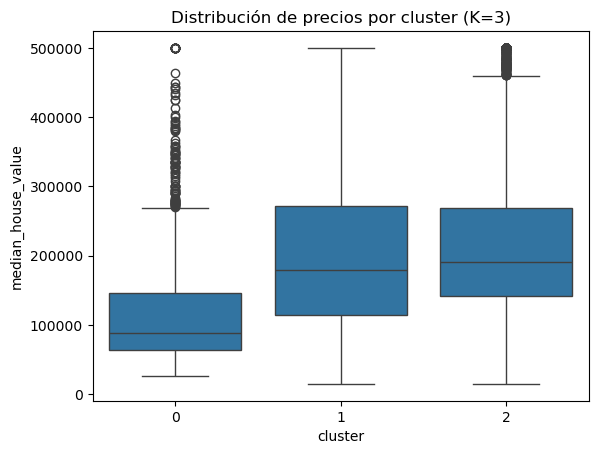

Silhouette Score: 0.6461157864451063


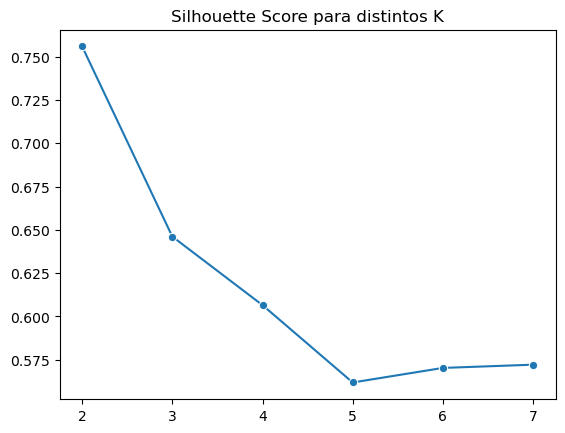

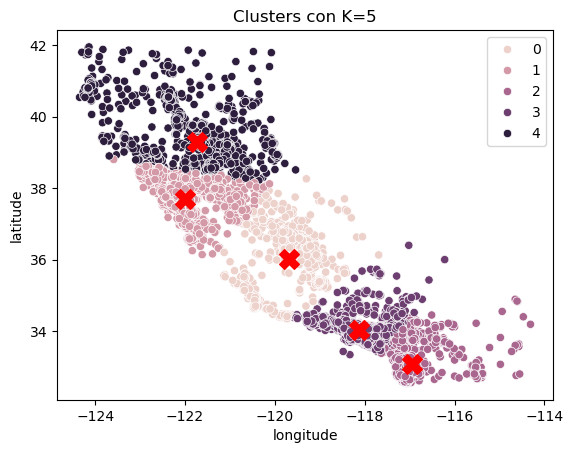

<Axes: ylabel='median_house_value'>

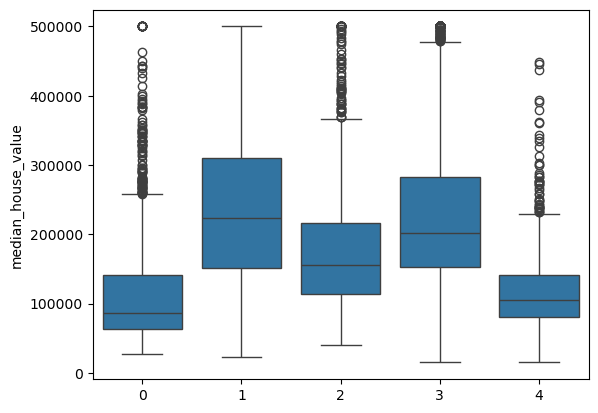

In [10]:
home_data = pd.read_csv('housing.csv', usecols=['longitude', 'latitude', 'median_house_value'])
home_data.head()

sns.scatterplot(data=home_data, x='longitude', y='latitude', hue='median_house_value')
plt.title("Distribución de precios por ubicación")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    home_data[['latitude', 'longitude']],
    home_data[['median_house_value']],
    test_size=0.33,
    random_state=0
)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_train_norm)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)

sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=kmeans.labels_)
plt.scatter(centroids[:, 1], centroids[:, 0], s=200, c='red', marker='X', label='Centroides')
plt.title("Clusters encontrados por K-Means")
plt.show()

clustered_data = pd.DataFrame({
    'cluster': kmeans.labels_,
    'median_house_value': y_train.values.flatten()
})

sns.boxplot(x='cluster', y='median_house_value', data=clustered_data)
plt.title("Distribución de precios por cluster (K=3)")
plt.show()

print("Silhouette Score:", silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean'))

K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train_norm)
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

sns.lineplot(x=K, y=score, marker='o')
plt.title("Silhouette Score para distintos K")
plt.show()

chosen_k = 5
chosen_model = fits[chosen_k - 2] 
chosen_centroids = scaler.inverse_transform(chosen_model.cluster_centers_)

sns.scatterplot(data=X_train, x='longitude', y='latitude', hue=chosen_model.labels_)
plt.scatter(chosen_centroids[:, 1], chosen_centroids[:, 0], s=200, c='red', marker='X', label='Centroides')
plt.title(f"Clusters con K={chosen_k}")
plt.show()

sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])
